In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [6]:
# create a dataframe to store results
results = pd.DataFrame()
# use a for loop to read all csv files
inputs = pd.read_csv('exp_mf_rbf_gpr_results_input.csv', index_col=0)
# read the outpout
outputs = pd.read_csv('exp_mf_rbf_gpr_results_output.csv', index_col=0)

# merge the inputs and outputs
results = pd.concat([inputs, outputs], axis=1)

In [7]:
results

,method,noise_std,num_hf,num_lf,problem,seed,normalized_mae,normalized_rmse,r2,mean_log_likelihood,lf_training_time,hf_training_time,inference_time,learned_noise_std
0,scaled_kriging,0.1,5,200,Forrester_1b,1,2.514862,1.032723,0.640559,-2.754553,4.293993,0.096272,0.018649,0.000017
1,scaled_kriging,0.1,10,200,Forrester_1b,1,0.376571,0.085928,0.997512,-0.247332,4.759947,0.313198,0.222657,0.025987
2,scaled_kriging,0.1,15,200,Forrester_1b,1,0.216699,0.039084,0.999485,0.324903,4.191377,0.364346,0.015314,0.168012
3,scaled_kriging,0.1,20,200,Forrester_1b,1,0.306688,0.053016,0.999053,0.346528,4.405943,0.705476,0.016177,0.053198
4,scaled_kriging,0.1,25,200,Forrester_1b,1,0.076520,0.026127,0.999770,0.608124,4.673239,0.451107,0.015715,0.111200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,hk,0.1,10,200,Forrester_1b,5,0.528711,0.097402,0.996803,-12456.958826,6.223781,0.304340,0.005071,0.000035
86,hk,0.1,15,200,Forrester_1b,5,0.274591,0.050957,0.999125,0.467754,6.788564,0.711577,0.006774,0.107876
87,hk,0.1,20,200,Forrester_1b,5,0.047050,0.021780,0.999840,0.582450,7.820419,0.762873,0.007186,0.145555
88,hk,0.1,25,200,Forrester_1b,5,0.188454,0.032860,0.999636,0.643802,7.693147,1.561821,0.008045,0.120006


In [8]:
# get a subset of the data with method = 'cokriging', "hk","scaled_kriging", "mf_rbf_gpr"
mf_rbf_gpr_results = results[results['method'] == 'mf_rbf_gpr']
#
cokriging_results = results[results['method'] == 'cokriging']
hk_results = results[results['method'] == 'hk']
scaled_kriging_results = results[results['method']
                                 == 'scaled_kriging']

(-10.0, 1.0)

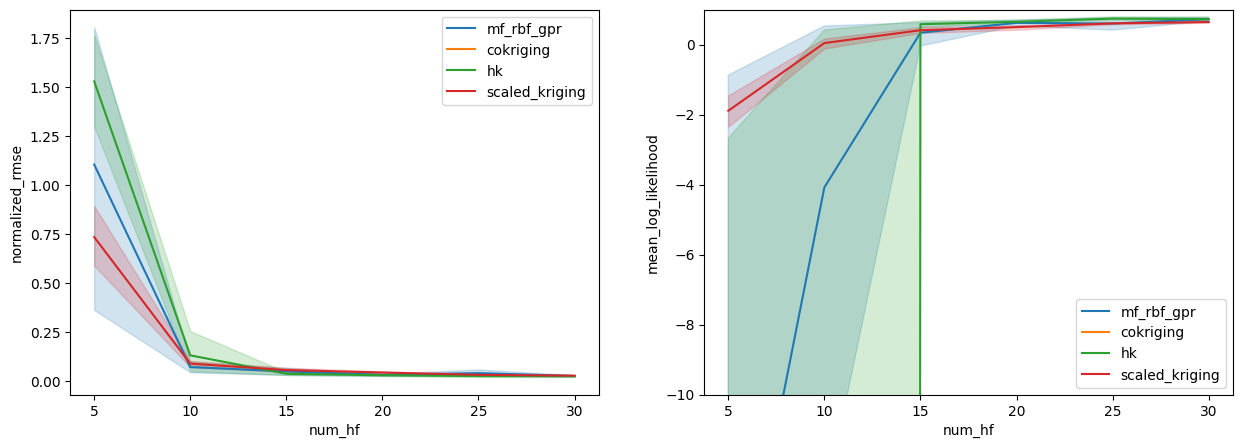

In [19]:
# plot the results by normalized_mae vs number of evaluations
problem = 'mf_Bohachevsky'
num_lf = 200
# select the subset of the data with problem = 'mf_Bohachevsky' and num_lf = 100


fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# plot the results
sns.lineplot(data=mf_rbf_gpr_results, x='num_hf',
             y='normalized_rmse',  label='mf_rbf_gpr', ax=ax[0])
sns.lineplot(data=cokriging_results, x='num_hf',
             y='normalized_rmse',  label='cokriging', ax=ax[0])
sns.lineplot(data=hk_results, x='num_hf',
             y='normalized_rmse', ax=ax[0], label='hk')
sns.lineplot(data=scaled_kriging_results, x='num_hf',
             y='normalized_rmse', ax=ax[0], label='scaled_kriging')

# plot the mean_log_likelihood
sns.lineplot(data=mf_rbf_gpr_results, x='num_hf',
             y='mean_log_likelihood',  label='mf_rbf_gpr', ax=ax[1])
sns.lineplot(data=cokriging_results, x='num_hf',
             y='mean_log_likelihood',  label='cokriging', ax=ax[1])
sns.lineplot(data=hk_results, x='num_hf',
             y='mean_log_likelihood', ax=ax[1], label='hk')
sns.lineplot(data=scaled_kriging_results, x='num_hf',
             y='mean_log_likelihood', ax=ax[1], label='scaled_kriging')
ax[1].set_ylim(-10, 1)

In [39]:
new_results['normalized_rmse'].values

array(['0.0848006188271087', '0.0466043210678952', '0.0227796585113812',
       '0.0198131900246736', '0.0133140119312682', '0.0210959683983628',
       '0.0807938234396961', '0.0298572352565769', '0.02362920967299',
       '0.0188074997486341', '0.0211803881243694', '0.0197000980796903',
       '0.0604603100711513', '0.0357621684154265', '0.0247763784280491',
       '0.0204313376687119', '0.0171783726837697', '0.0151241325025203',
       '0.0611739525781922', '0.0433183312720475', '0.0208108283535797',
       '0.0201075479931906', '0.0190936815905337', '0.0168173270242304',
       '0.0580605269782983', '0.0469636995912794', '0.0197597622422722',
       '0.026232143940909', '0.0144498545987159', '0.0219758453273667'],
      dtype=object)

In [15]:
new_results['num_hf']

6408     5
6411    10
6414    15
6417    20
6420    25
6423    30
6534     5
6537    10
6540    15
6543    20
6546    25
6549    30
6660     5
6663    10
6666    15
6669    20
6672    25
6675    30
6786     5
6789    10
6792    15
6795    20
6798    25
6801    30
6912     5
6915    10
6918    15
6921    20
6924    25
6927    30
Name: num_hf, dtype: int64

In [31]:
new_results["normalized_rmse"].values

'0.0219758453273667'

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot normalized RMSE on the left y-axis
color = "tab:blue"
ax1.set_xlabel("Number of evaluations")
ax1.set_ylabel("Normalized RMSE", color=color)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    palette="colorblind",
    marker="^",
    legend="full",
    linewidth=2,
    y="mf_normalized_rmse",
    hue="noise_std",
    ax=ax1,
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="s",
    legend="full",
    linestyle="dashed",
    y="sf_normalized_rmse",
    ax=ax1,
)
ax1.tick_params(axis="y", labelcolor=color)

ax1.get_legend().remove()

# Create another y-axis for log likelihood
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Log Likelihood", color=color)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="^",
    legend="full",
    y="mf_mean_log_likelihood",
    ax=ax2,
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="s",
    legend="full",
    linestyle="dashed",
    y="sf_mean_log_likelihood",
    ax=ax2,
)
ax2.tick_params(axis="y", labelcolor=color)
ax2.get_legend().remove()
# set the legend scale of the right y-axis into log scale
# ax2.set_yscale('log')

# add legend

plt.show()

In [ ]:
# problem information
problem_sets = [
    "Bohachevsky",
    "Booth",
    "Borehole",
    "CurrinExp",
    "Hartman3",
    "Hartman6",
    "Park91A",
    "Park91B",
    "Sixhump",
]
dimensions = [2, 2, 8, 2, 3, 6, 4, 4, 2]
r2 = [0.857, 0.925, 1.000, 0.997, -0.196, 0.712, 0.994, 1.0000, 0.833]

# # set r2 to have 3 decimal places
# r2 = [round(i, 3) for i in r2]
# print(r2)

In [ ]:
problem_set = mf_rbf_gpr_results["problem"].unique()

font_size = 14
fig, ax = plt.subplots(3, 3, figsize=(16, 9))
# for problem in problem_set:

for ii in range(3):
    for jj in range(3):
        problem = problem_set[ii * 3 + jj]
        result = mf_rbf_gpr_results[(mf_rbf_gpr_results["problem"] == problem)]
        # Plot normalized RMSE on the left y-axis
        color = "tab:blue"
        if ii == 2:
            ax[ii, jj].set_xlabel(
                "number of HF samples (d)", fontsize=font_size)
        else:
            ax[ii, jj].set_xlabel(" ")
        if jj == 0:
            ax[ii, jj].set_ylabel("NRMSE", color=color)
        else:
            ax[ii, jj].set_ylabel(" ", color=color)
        sns.lineplot(
            data=result,
            x="num_hf",
            palette="colorblind",
            marker="^",
            legend="full",
            linewidth=2,
            y="mf_normalized_rmse",
            hue="noise_std",
            ax=ax[ii, jj],
            err_style="bars",
        )
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="s",
            legend="full",
            linewidth=2,
            linestyle="dashed",
            y="sf_normalized_rmse",
            ax=ax[ii, jj],
            err_style="bars",
        )
        ax[ii, jj].tick_params(axis="y", labelcolor=color)
        ax[ii, jj].get_legend().remove()
        # Create another y-axis for log likelihood
        ax2 = ax[ii, jj].twinx()
        color = "tab:red"
        if jj == 2:
            ax2.set_ylabel("Log Likelihood", color=color, fontsize=font_size)
        else:
            ax2.set_ylabel(" ", color=color)
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="^",
            legend="full",
            linewidth=2,
            y="mf_mean_log_likelihood",
            err_style="bars",
            ax=ax2,
        )
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="s",
            legend="full",
            linestyle="dashed",
            linewidth=2,
            err_style="bars",
            y="sf_mean_log_likelihood",
            ax=ax2,
        )
        ax2.tick_params(axis="y", labelcolor=color)
        # remove the legend of ax2
        if ii == 2 and jj == 2:
            ax2.legend(fontsize=12)
        else:
            ax2.get_legend().remove()

        # set the font of axis and y-axis precision
        ax[ii, jj].tick_params(axis="both", which="major", labelsize=font_size)
        ax2.tick_params(axis="both", which="major", labelsize=font_size)
        # set the line width of the axis
        for axis in ["top", "bottom", "left", "right"]:
            ax[ii, jj].spines[axis].set_linewidth(1.5)
        ax2.spines["right"].set_linewidth(1.5)
        # get title info
        title = (
            problem_sets[ii * 3 + jj]
            + " (d="
            + str(dimensions[ii * 3 + jj])
            + ", r="
            + str(r2[ii * 3 + jj])
            + ")"
        )
        ax[ii, jj].set_title(title)
        # set space between subplots
        plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.savefig("gpr_comparison_at_200lf_samples.png",
            dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_200lf_samples.pdf",
            dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_200lf_samples.svg",
            dpi=300, bbox_inches="tight")
plt.show()